<a href="https://colab.research.google.com/github/Wezz-git/AI-samples/blob/main/(K_Means_Clustering)_Customer_Segmentation_w_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Business Problem:

You're a data scientist at a bank. They have data on all their credit card customers (their spending, balance, etc.), but they treat them all the same. Your boss asks, "Can you find groups or segments in our customers? I want to create different marketing campaigns for 'big spenders', 'savers', 'high-risk', etc."

This is Clustering, and the most famous algorithm for it is K-Means. You'll be "teaching" the model to find the natural groups in the data all by itself.

Tools: Use of KMeans from scikit-learn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing tools
from sklearn.preprocessing import StandardScaler     # Important for clustering

# the model
from sklearn.cluster import KMeans

# Cluster visualization
from sklearn.decomposition import PCA            # To make a 2D plot

In [ ]:
import pandas as pd

# Get kaggle data of : Credit Card Dataset for Clustering
# Load the data
df = pd.read_csv('/content/sample_data/CC GENERAL.csv')

print(df.head())    # First 5 rows
print(df.info())    # Data summary

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

Handling Missing Data (Credit_limit) & (minimum_payments)

- Fill missing sports with average (mean)

In [ ]:
# 1 - Get the mean for 'CREDIT_LIMIT'

credit_limit_mean = df['CREDIT_LIMIT'].mean()

# Fill NaNs in that column with the mean

df['CREDIT_LIMIT'].fillna(credit_limit_mean, inplace=True)   # df document is permanently changed

# 2 - Get the mean for 'MINIMUM_PAYMENTS'

minimum_payments_mean = df['MINIMUM_PAYMENTS'].mean()

# Fill NaNs in that column with the mean

df['MINIMUM_PAYMENTS'].fillna(minimum_payments_mean, inplace=True)

df.head()

/tmp/ipython-input-2188932324.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(credit_limit_mean, inplace=True)   # df document is permanently changed
/tmp/ipython-input-2188932324.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Scale the Data

use of StandardScaler transforms every column to have a mean of 0 and a standard deviation of 1.

In [ ]:
# 1 - Drop the customer ID column as its not a feature
df_features = df.drop('CUST_ID', axis=1)

# 2 - Create the scaler
scaler = StandardScaler()

# 3 - Fit the scaler to the data and transform it
# learns the mean/std of every column and scales it
data_scaled = scaler.fit_transform(df_features)

# 4 - Check work
print(data_scaled[0:5])

[[-7.31989366e-01 -2.49434481e-01 -4.24899735e-01 -3.56934022e-01
  -3.49078819e-01 -4.66785554e-01 -8.06490346e-01 -6.78660808e-01
  -7.07313165e-01 -6.75348858e-01 -4.76069817e-01 -5.11333250e-01
  -9.60433344e-01 -5.28978791e-01 -3.10967549e-01 -5.25550971e-01
   3.60679544e-01]
 [ 7.86960853e-01  1.34324671e-01 -4.69551882e-01 -3.56934022e-01
  -4.54576230e-01  2.60560451e+00 -1.22175806e+00 -6.78660808e-01
  -9.16995191e-01  5.73962722e-01  1.10073852e-01 -5.91795877e-01
   6.88639034e-01  8.18642127e-01  8.93102090e-02  2.34226897e-01
   3.60679544e-01]
 [ 4.47135132e-01  5.18083823e-01 -1.07668230e-01  1.08888513e-01
  -4.54576230e-01 -4.66785554e-01  1.26984323e+00  2.67345108e+00
  -9.16995191e-01 -6.75348858e-01 -4.76069817e-01 -1.09020117e-01
   8.26061732e-01 -3.83804738e-01 -1.01663181e-01 -5.25550971e-01
   3.60679544e-01]
 [ 4.90991395e-02 -1.01695278e+00  2.32057847e-01  5.46189456e-01
  -4.54576230e-01 -3.68653254e-01 -1.01412545e+00 -3.99319268e-01
  -9.16995191e-01 -

Elbow Method - to find the "best" K

For each "K", it measures something called "inertia" (how spread out the clusters are).

Calculating inertia for k=1 to 10..
Calculating complete


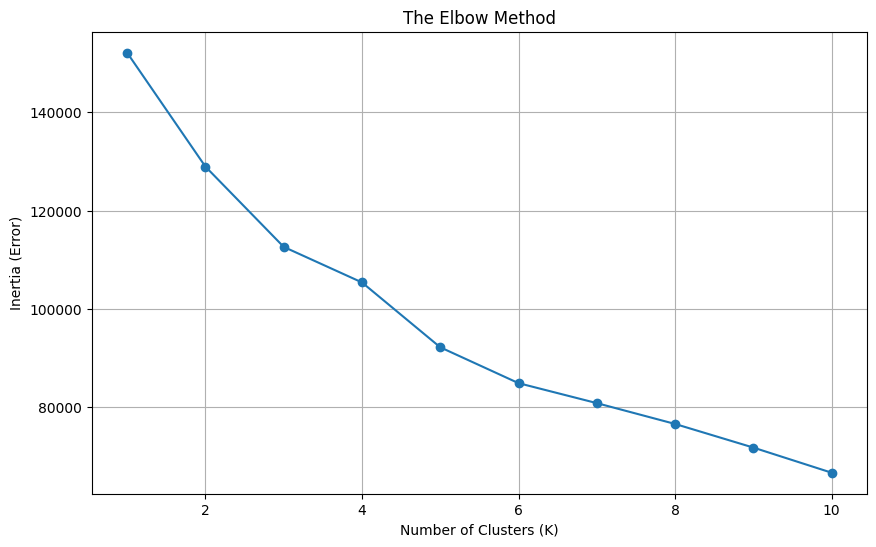

In [ ]:
# Assume 'data_scaled' is in memory

# 1 - Create empty list to store the inertia scores
inertia_scores = []

# 2 - Define a range of K's to test
k_range = range(1, 11)

print("Calculating inertia for k=1 to 10..")

# 3 - loop through each K
for k in k_range:
  # Create the K-Means model for this 'k' (n_clusters)
  # n_init='auto' - model default that suppresses a warning
  model = KMeans (n_clusters=k, n_init='auto', random_state=42)

  # Train the model
  model.fit(data_scaled)

  # Score the inertia (the error score)
  inertia_scores.append(model.inertia_)

print("Calculating complete")

# 4 - Plot the embow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_scores, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Error)')
plt.grid()
plt.show()

Look at where the "Elbow" has the sharpest bend.

K=3, 4, or 5. This number is the "optimal number of clusters."

For final model:

1 - Choose the K: eg n_clusters=4 as a placeholder. Change this number to whatever the elbow plot suggested.

2 - Train the Final Model: Run K-Means with chosen K.

3 - Get the Labels: Assign each customer to one of new clusters (e.g., Cluster 0, 1, 2, 3).

4 - Visualize (PCA): Cannot plot 17 columns, so we'll use PCA to "squash" them down to 2D so we can see a map of our new customer segments.

Running final K-Means model with 3 clusters..
Visualizing clusters using PCA..


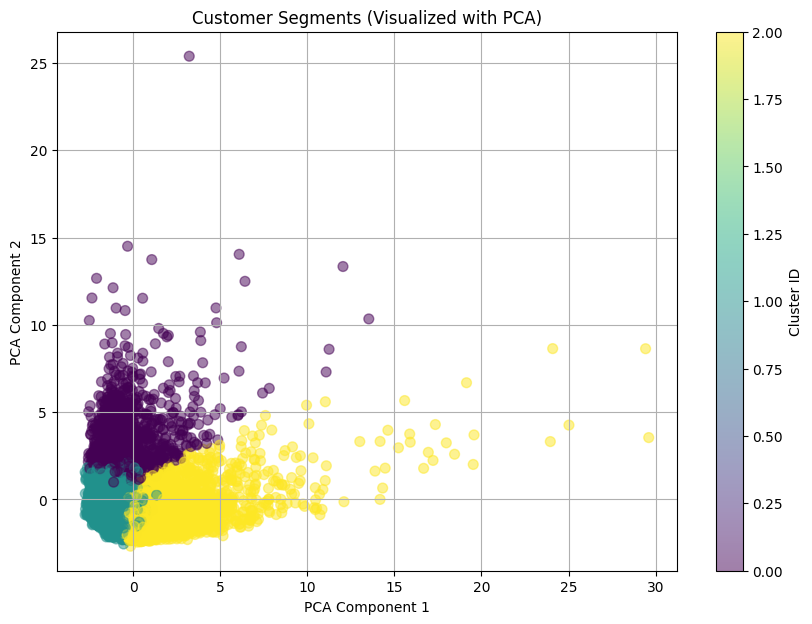

In [ ]:
# (Assuming 'data_scaled' and origianl 'df' in memory)

# 1 - Choose the 'K'
# Adjust number based on elbow plot

optimal_k = 3
print(f"Running final K-Means model with {optimal_k} clusters..")

# 2 - Run the final model
# n_clusters=optimal_k - important, tells model how many clusters to look for from elbow method
# n_init='auto' - makes model run faster/smarter for picking points. ALWAYS use 'auto' to avoid technical warning.
# random_state=42 - reproducibility - forcing the model to use the exact same "random" starting point every time. Always get the same final clsuters
model = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
model.fit(data_scaled)

# 3 - Get the Cluster Labels
# Assigns a cluster number (0, 1, 2, 3..) to each customer
clusters = model.labels_

# 4 - Add labels back to original (unscaled) DataFrame
df['cluster'] = clusters

# 5 - visualize the Clusters (with PCA)
print("Visualizing clusters using PCA..")

# 5.1 - Create PCA to change data to 2D
pca = PCA(n_components=2)
data_scaled_2d = pca.fit_transform(data_scaled)

# 5.2 - Put 2D data and cluster into new DataFrame (df)
# PCA1 - X-axis (squahed feature)
# PCA2 - y-ais

df_pca = pd.DataFrame(data_scaled_2d, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

# 5.3 Plot the 2D scatter plot
plt.figure(figsize=(10, 7))

# Use 'Scatter' to plot the points, colored by their clusters
# c=df_pca['cluster'] - Color agument, color each dot based on cluster number
# cmap='viridis'- Color map - tells which color to use and viridis goes purle, green, yellow
# s=50 - size, s10-s100. # alphs=0.5 = 1.0 = opaque, 0.5 makes dots 50% transparent

plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Cluster'], cmap='viridis', s=50, alpha=0.5)
plt.title('Customer Segments (Visualized with PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster ID')
plt.grid()
plt.show()

Above is a 2D map of all 8,950 customers, and the colors show the "segments" your K-Means model found.

# ADDITIONAL STEP

Analyze the clusters -

Calculate the average value of every feature for each cluster. This will give the "profile" for each group.

In [ ]:
# Assuming 'df' is in memory and has 'cluster' column

# Drop out CUST_ID in analysis
analysis_df = df.drop(columns=['CUST_ID'])

# 1. Group the DataFrame by the 'cluster' column
# 2. Calculate the .mean() for every other column

cluster_profiles = analysis_df.groupby('cluster').mean()

# 3. Print the new "profile" table

print("--- Cluster Profiles (Averages) ---")
print(cluster_profiles)

--- Cluster Profiles (Averages) ---
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                  
0        4545.974404           0.968555   578.629243        363.840483   
1         943.444730           0.789577   302.146789        207.553551   
2        1288.676491           0.968227  2185.116559       1239.540251   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                    214.870685   4513.943197             0.286012   
1                     94.891652    530.425643             0.244520   
2                    945.965035    235.200775             0.926645   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.136806                          0.187025   
1                      

No longer looking at 8,950 individual customers; We are looking at the 3 "personas" that your model has discovered.

Cluster Analysis:

Cluster 2: The "Prime Customers" (Your Best Customers)
This is your ideal, high-value group.

They have the highest PURCHASES by far ($2185) and the highest PURCHASES_FREQUENCY (0.92).

Meaning: These customers use their card all the time for actual purchases (not cash advances). They also have the highest rate of paying their bill in full (PRC_FULL_PAYMENT is 0.28, the highest).

Marketing Action: Target this group with rewards programs and credit limit increases to encourage them to spend even more.